In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\nickr\OneDrive\Documents\Nick Bootcamp\Python\Instacart Basket Analysis'

In [5]:
new_customer_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_orders_products_combined.pkl'))

In [ ]:
#2. Considering user name data as sensitive, this information will not be used.
#However, it is important to note that there is missing data which should be corrected to avoid using wrong names when sending ads or promotions.

In [7]:
#3. Creating Groups for States by Regions
def region(row):
    if row['STATE'] in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        return 'Northeast'
    elif row['STATE'] in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        return 'Midwest'
    elif row['STATE'] in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','Sout Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        return 'South'
    elif row['STATE'] in ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']:
        return 'West'
    else: return 'Missing Data'
new_customer_data['Region'] = new_customer_data.apply(region,axis=1)

In [9]:
#Checking for region column
new_customer_data.head()

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,Dependants,Familial_Status,income,...,Busiest_Days,Busiest_period_of_day,max_order,loyalty_flag,type_of_spender,spender_flag,order_frequency,frequency_flag,_merge,Region
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest day,Most Orders,8,New customer,9.000,Low Spender,11.0,Regular customer,both,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most Orders,8,New customer,9.000,Low Spender,11.0,Regular customer,both,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest day,Most Orders,8,New customer,9.000,Low Spender,11.0,Regular customer,both,Midwest
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Regularly busy,Most Orders,5,New customer,7.975,Low Spender,28.0,Non-frequent customer,both,West
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Busiest day,Average Orders,5,New customer,7.975,Low Spender,28.0,Non-frequent customer,both,West


In [11]:
#Checking spending differences between regions
spender_counts = new_customer_data.groupby('Region')['spender_flag'].value_counts()
print(spender_counts)

Region        spender_flag
Midwest       Low Spender     184620
              High Spender     48784
Missing Data  Low Spender      15709
              High Spender      4009
Northeast     Low Spender     139598
              High Spender     37612
South         Low Spender     248693
              High Spender     64903
West          Low Spender     202919
              High Spender     53153
Name: count, dtype: int64


In [ ]:
# The south region has the most high spenders amongst all regions while the noertheast has the fewest. The south also has the most low spenders.

In [13]:
#4. Creating a flag for low-activity customers based on amount of max orders
def relevant_rev(row):
    if row['max_order'] <5:
        return 'Remove_Customer_Data'
    else: return 'Keep_Customer_Data'
new_customer_data['relevant_customer'] = new_customer_data.apply(relevant_rev, axis=1)

In [15]:
# Checking new relevant customer flag row
new_customer_data.head()

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,Dependants,Familial_Status,income,...,Busiest_period_of_day,max_order,loyalty_flag,type_of_spender,spender_flag,order_frequency,frequency_flag,_merge,Region,relevant_customer
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Most Orders,8,New customer,9.000,Low Spender,11.0,Regular customer,both,Midwest,Keep_Customer_Data
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Most Orders,8,New customer,9.000,Low Spender,11.0,Regular customer,both,Midwest,Keep_Customer_Data
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Most Orders,8,New customer,9.000,Low Spender,11.0,Regular customer,both,Midwest,Keep_Customer_Data
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Most Orders,5,New customer,7.975,Low Spender,28.0,Non-frequent customer,both,West,Keep_Customer_Data
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Average Orders,5,New customer,7.975,Low Spender,28.0,Non-frequent customer,both,West,Keep_Customer_Data


In [17]:
# Checking value counts for relevant customer column
relevant_counts = new_customer_data['relevant_customer'].value_counts()
print(relevant_counts)

relevant_customer
Keep_Customer_Data      921333
Remove_Customer_Data     78667
Name: count, dtype: int64


In [19]:
#Dropping irrelevant customers
updated_customer_data = new_customer_data.drop(new_customer_data[new_customer_data['relevant_customer'] == 'Remove_Customer_Data'].index)

In [21]:
# Checking if irrelevant customers were dropped
relevant_counts = updated_customer_data['relevant_customer'].value_counts()
print(relevant_counts)

relevant_customer
Keep_Customer_Data    921333
Name: count, dtype: int64


In [23]:
#5. Creating customer profile columns including income, age, familial status, dependants, and department id purchases
# Income Status Profile
def income_profile(row):
    if row['income'] < 30000 :
        return 'low income'
    elif (row['income'] > 30000) and (row['income'] <= 90000):
        return 'middle income'
    elif row['income'] > 90000 :
        return 'high income'
    else: return 'Not enough data'
updated_customer_data['income_status'] = updated_customer_data.apply(income_profile, axis=1)

In [25]:
# Age Profile
def age_profile(row):
    if (row['Age'] >= 18) and (row['Age'] <= 25):
        return 'young adult'
    elif (row['Age'] >= 26) and (row['Age'] <= 64):
        return 'middle aged adult'
    elif row['Age'] >= 65:
        return 'elder adult'
    else: return 'Missing Data'
updated_customer_data['age status'] = updated_customer_data.apply(age_profile, axis=1)

In [27]:
# Checking profile rows are correct
updated_customer_data.head()

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,Dependants,Familial_Status,income,...,loyalty_flag,type_of_spender,spender_flag,order_frequency,frequency_flag,_merge,Region,relevant_customer,income_status,age status
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,New customer,9.000,Low Spender,11.0,Regular customer,both,Midwest,Keep_Customer_Data,high income,middle aged adult
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,New customer,9.000,Low Spender,11.0,Regular customer,both,Midwest,Keep_Customer_Data,high income,middle aged adult
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,New customer,9.000,Low Spender,11.0,Regular customer,both,Midwest,Keep_Customer_Data,high income,middle aged adult
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,New customer,7.975,Low Spender,28.0,Non-frequent customer,both,West,Keep_Customer_Data,middle income,middle aged adult
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,New customer,7.975,Low Spender,28.0,Non-frequent customer,both,West,Keep_Customer_Data,middle income,middle aged adult


In [29]:
# Creating familial status profile
def familial_profile(row):
    if row['Familial_Status'] == 'married' :
        return 'married'
    elif row['Familial_Status'] == 'single' :
        return 'single'
    else : return 'Missing Data'
updated_customer_data['Familial_Status'] = updated_customer_data.apply(familial_profile, axis=1)

In [31]:
# Dependant Profile
def dependant_profile(row):
    if row['Dependants'] == 0 :
        return 'no children'
    elif row['Dependants'] >= 1:
        return 'children'
    else: return 'Missing Data'
updated_customer_data['Dependant_Status'] = updated_customer_data.apply(dependant_profile, axis=1)

In [33]:
# Checking all newly created columns
updated_customer_data.head()

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,Dependants,Familial_Status,income,...,type_of_spender,spender_flag,order_frequency,frequency_flag,_merge,Region,relevant_customer,income_status,age status,Dependant_Status
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.000,Low Spender,11.0,Regular customer,both,Midwest,Keep_Customer_Data,high income,middle aged adult,children
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.000,Low Spender,11.0,Regular customer,both,Midwest,Keep_Customer_Data,high income,middle aged adult,children
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.000,Low Spender,11.0,Regular customer,both,Midwest,Keep_Customer_Data,high income,middle aged adult,children
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,7.975,Low Spender,28.0,Non-frequent customer,both,West,Keep_Customer_Data,middle income,middle aged adult,no children
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,7.975,Low Spender,28.0,Non-frequent customer,both,West,Keep_Customer_Data,middle income,middle aged adult,no children


In [35]:
#Examining customer profiles on age
age_group_counts = updated_customer_data['age status'].value_counts()
print(age_group_counts)

age status
middle aged adult    560695
elder adult          243709
young adult          116929
Name: count, dtype: int64


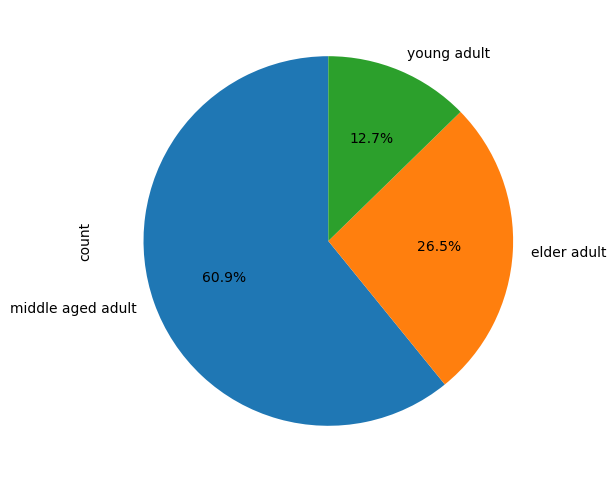

In [37]:
#6. Creating visualizations to reflect created profiles
# Creating pie chart to include percentages
age_group_counts_pie_chart = age_group_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 6))

In [ ]:
# Middle aged adults make up almost 61% of instacarts customer base. Elder adults are the second largest population at about 27%.
# Young adults only make up abou 13% of Instacart's userbase.

In [39]:
# Examining customer profiles based on income
income_group_counts = updated_customer_data['income_status'].value_counts()
print(income_group_counts)

income_status
high income        529506
middle income      385588
low income           6236
Not enough data         3
Name: count, dtype: int64


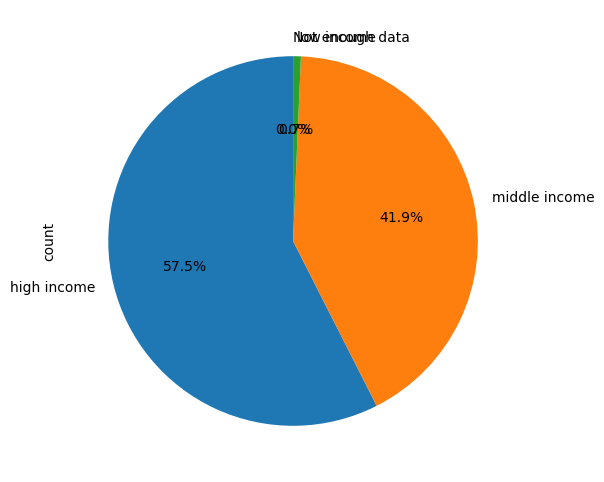

In [41]:
# Creating a pie chart for income status
income_status_pie_chart = income_group_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 6))

In [43]:
# Examining customer profiles based on familial status
familial_group_counts = updated_customer_data['Familial_Status'].value_counts()
print(familial_group_counts)

Familial_Status
married         645032
single          152839
Missing Data    123462
Name: count, dtype: int64


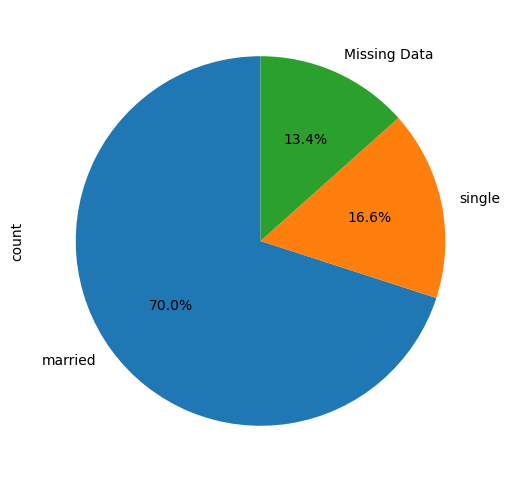

In [45]:
# Creating a pie chart for familial status
familial_status_pie_chart = familial_group_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 6))

In [47]:
# Examining customer profiles based on dependant status
dependant_group_counts = updated_customer_data['Dependant_Status'].value_counts()
print(dependant_group_counts)

Dependant_Status
children       689727
no children    231606
Name: count, dtype: int64


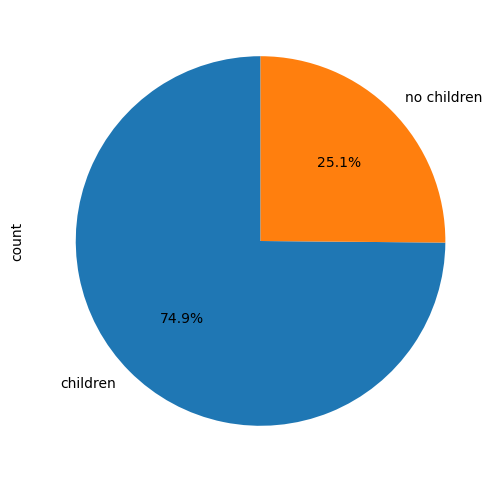

In [49]:
# Creating a pie chart for dependant status
dependant_status_pie_chart = dependant_group_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 6))

In [51]:
# 7. Examining max, mean, min variables on a customer profile level using order frequency and type of spender.
# Aggregating order frequency for age groups
updated_customer_data.groupby('age status').agg({'order_frequency' : ['mean','max','min']})

order_frequency           
                             mean   max  min
age status                                  
elder adult             10.030395  30.0  0.0
middle aged adult       10.013535  30.0  0.0
young adult              9.975755  30.0  0.0

In [53]:
# Aggregating type of spender for age groups
updated_customer_data.groupby('age status').agg({'type_of_spender' : ['mean','max','min']})

type_of_spender           
                             mean   max  min
age status                                  
elder adult              7.822421  22.5  1.0
middle aged adult        7.847451  24.3  1.0
young adult              7.862706  23.8  1.0

In [55]:
# Aggregating order frequency for income groups
updated_customer_data.groupby('income_status').agg({'order_frequency' : ['mean','max','min']})

order_frequency            
                           mean   max   min
income_status                              
Not enough data       12.000000  12.0  12.0
high income            9.938139  30.0   0.0
low income            10.733162  30.0   0.0
middle income         10.104618  30.0   0.0

In [57]:
# Aggregating type of spender for income groups
updated_customer_data.groupby('income_status').agg({'type_of_spender' : ['mean','max','min']})

type_of_spender           
                           mean   max  min
income_status                             
Not enough data        1.600000   1.6  1.6
high income            7.934400  24.3  1.0
low income             7.213566  21.6  1.1
middle income          7.727154  24.3  1.0

In [59]:
# Aggregating order frequency for familial groups
updated_customer_data.groupby('Familial_Status').agg({'order_frequency' : ['mean','max','min']})

order_frequency           
                           mean   max  min
Familial_Status                           
Missing Data           9.944959  30.0  0.0
married               10.037658  30.0  0.0
single                 9.965104  30.0  0.0

In [61]:
# Aggregating type of spender for familial groups
updated_customer_data.groupby('Familial_Status').agg({'type_of_spender' : ['mean','max','min']})

type_of_spender           
                           mean   max  min
Familial_Status                           
Missing Data           7.852022  22.5  1.0
married                7.833007  24.3  1.0
single                 7.876475  23.8  1.0

In [63]:
# Aggregating order frequency for dependant groups
updated_customer_data.groupby('Dependant_Status').agg({'order_frequency' : ['mean','max','min']})

order_frequency           
                            mean   max  min
Dependant_Status                           
children               10.028564  30.0  0.0
no children             9.967445  30.0  0.0

In [65]:
# Aggregating type of spender for dependant groups
updated_customer_data.groupby('Dependant_Status').agg({'type_of_spender' : ['mean','max','min']})

type_of_spender           
                            mean   max  min
Dependant_Status                           
children                7.836286  24.3  1.0
no children             7.862061  23.8  1.0

([0, 1, 2],
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

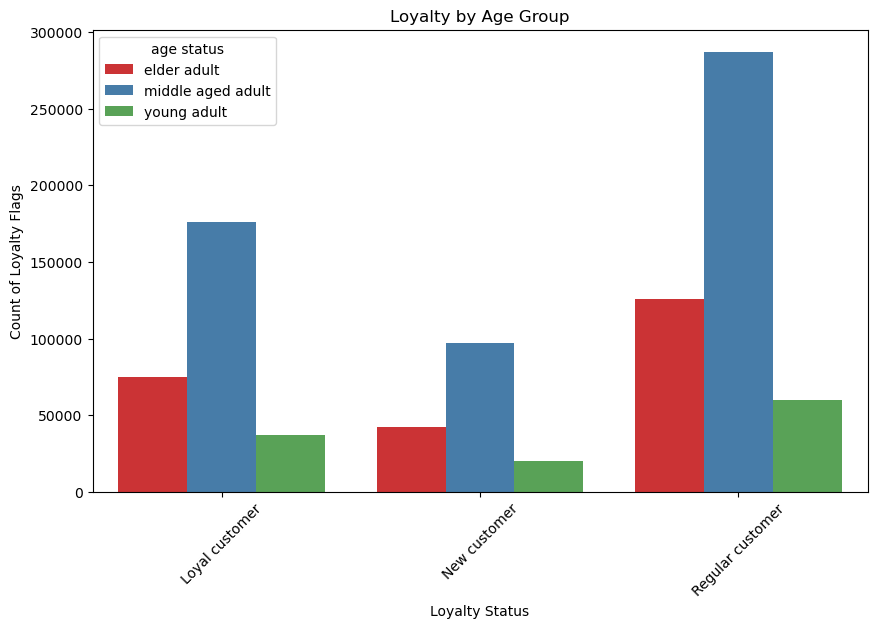

In [87]:
#8. Creating graphs to compare customer profiles amongst loyalty groups
# Creating a bar graph for age groups within loyalty flags
loyalty_counts = updated_customer_data.groupby(['age status', 'loyalty_flag']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(data=loyalty_counts, x='loyalty_flag', y='count', hue='age status', palette='Set1')
plt.xlabel('Loyalty Status')
plt.ylabel('Count of Loyalty Flags')
plt.title('Loyalty by Age Group')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

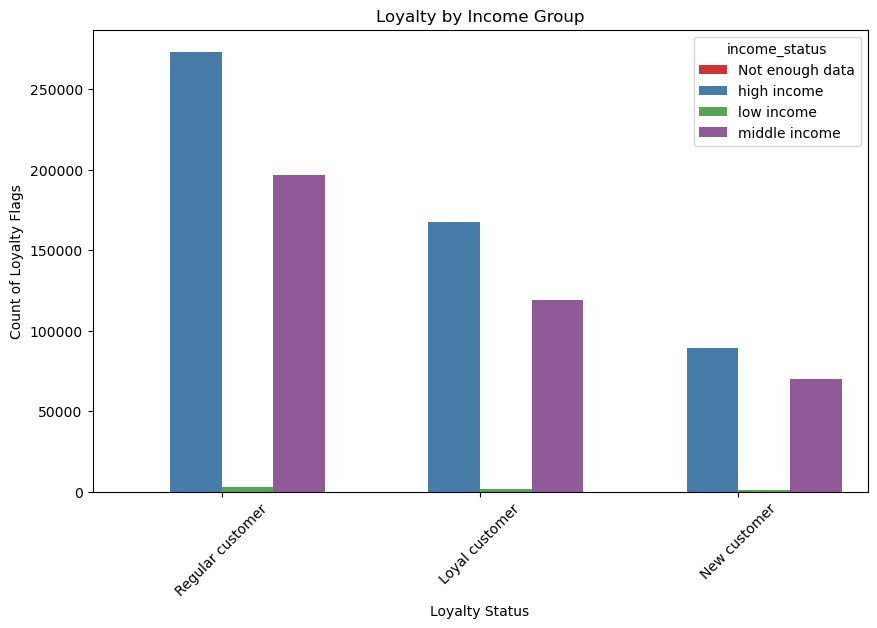

In [89]:
# Creating a graph for income within loyalty groups
loyalty_counts = updated_customer_data.groupby(['income_status', 'loyalty_flag']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(data=loyalty_counts, x='loyalty_flag', y='count', hue='income_status', palette='Set1')
plt.xlabel('Loyalty Status')
plt.ylabel('Count of Loyalty Flags')
plt.title('Loyalty by Income Group')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

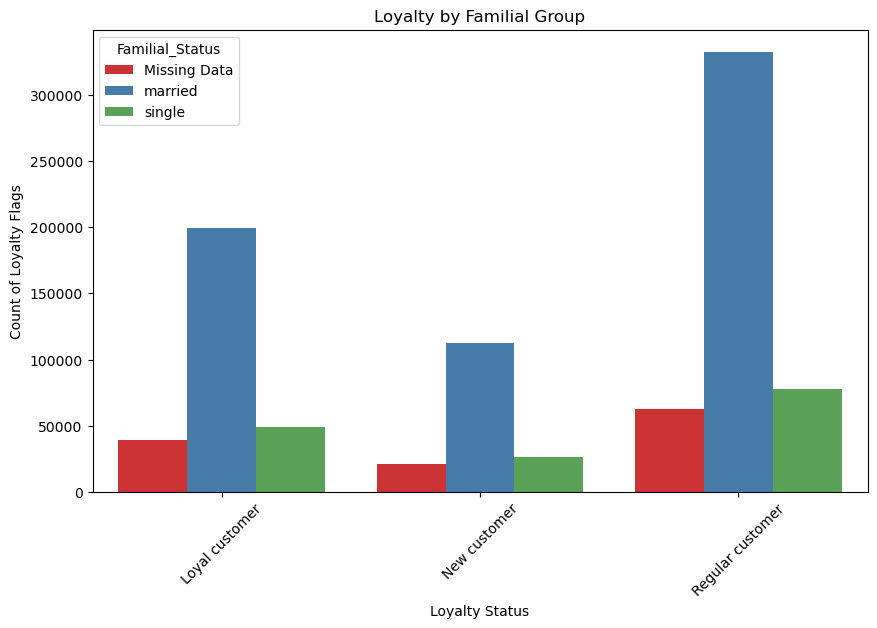

In [91]:
# Creating a graph with familial status amongst loyalty groups
loyalty_counts = updated_customer_data.groupby(['Familial_Status', 'loyalty_flag']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(data=loyalty_counts, x='loyalty_flag', y='count', hue='Familial_Status', palette='Set1')
plt.xlabel('Loyalty Status')
plt.ylabel('Count of Loyalty Flags')
plt.title('Loyalty by Familial Group')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

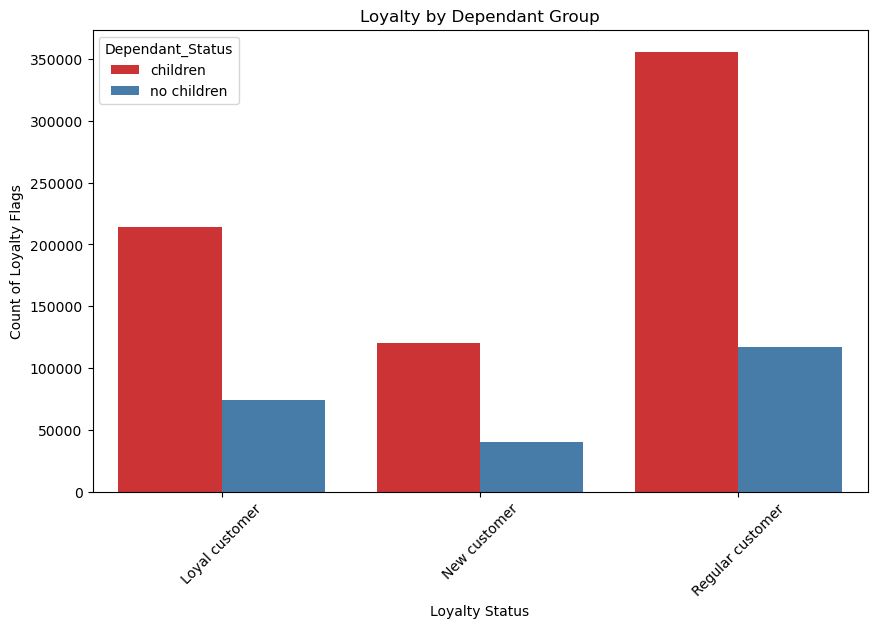

In [93]:
# Creating a graph with dependant status amongst loyalty groups
loyalty_counts = updated_customer_data.groupby(['Dependant_Status', 'loyalty_flag']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(data=loyalty_counts, x='loyalty_flag', y='count', hue='Dependant_Status', palette='Set1')
plt.xlabel('Loyalty Status')
plt.ylabel('Count of Loyalty Flags')
plt.title('Loyalty by Dependant Group')
plt.xticks(rotation=45)

In [67]:
# Mapping Department_ID
department_mapping = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'dairy eggs',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry good pastas',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'produce',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'}
updated_customer_data['department_id'] = updated_customer_data['department_id'].replace(department_mapping)

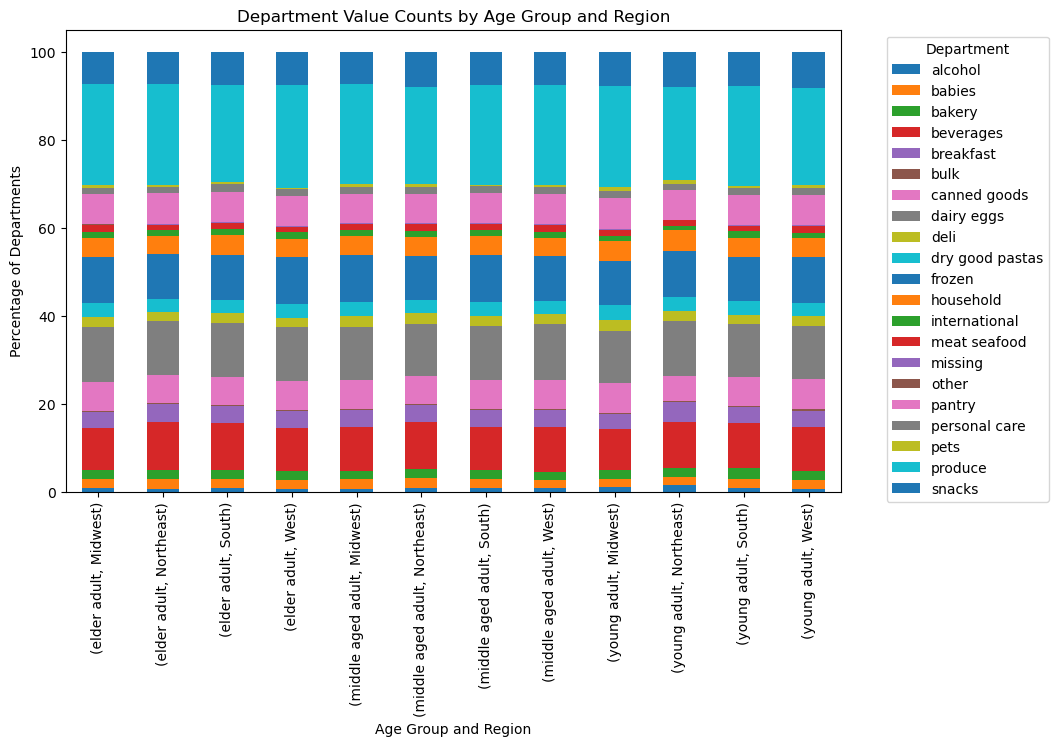

In [71]:
# Comparing department purchases amongst age groups in different regions using a 100% stacked bar graph
# Filtering out Regions marked as "Missing Data"
age_region_department_filtered = updated_customer_data[updated_customer_data['Region'] != 'Missing Data']
#Creating a 100% stacked bar graph
age_region_department_counts = age_region_department_filtered.groupby(['age status', 'Region', 'department_id']).size().unstack(fill_value=0)
percent_data = age_region_department_counts.div(age_region_department_counts.sum(axis=1), axis=0) * 100
ax = percent_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Age Group and Region')
plt.ylabel('Percentage of Departments')
plt.title('Department Value Counts by Age Group and Region')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Department_Age_Region_4.10.png'), bbox_inches='tight')

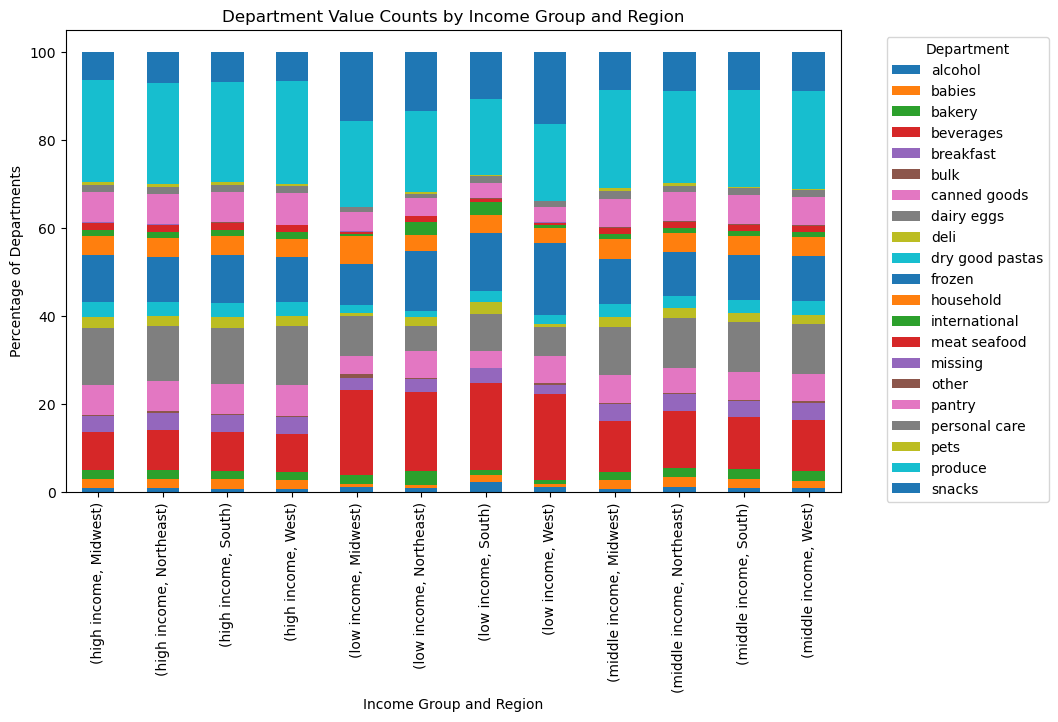

In [73]:
# Comparing Income status amongst regions
# Filtering missing data
income_region_department_filtered = updated_customer_data[
    (updated_customer_data['Region'] != 'Missing Data') &
    (updated_customer_data['income_status'] != 'Not enough data')]
#Creating stacked graph
income_region_department_counts = income_region_department_filtered.groupby(['income_status', 'Region', 'department_id']).size().unstack(fill_value=0)
percent_data = income_region_department_counts.div(income_region_department_counts.sum(axis=1), axis=0) * 100
ax = percent_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Income Group and Region')
plt.ylabel('Percentage of Departments')
plt.title('Department Value Counts by Income Group and Region')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Department_Income_Region_4.10.png'), bbox_inches='tight')

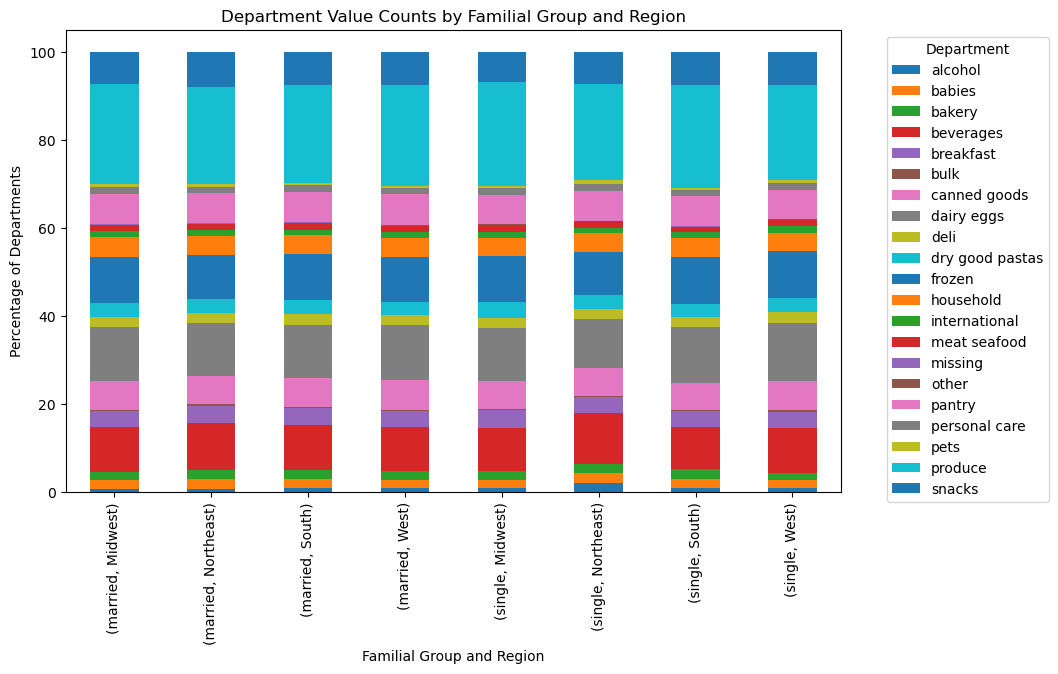

In [75]:
# Comparing Familial status amongst regions
# Filtering missing data
familial_region_department_filtered = updated_customer_data[
    (updated_customer_data['Region'] != 'Missing Data') &
    (updated_customer_data['Familial_Status'] != 'Missing Data')]
#Creating a 100% stacked bar graph
familial_region_department_counts = familial_region_department_filtered.groupby(['Familial_Status', 'Region', 'department_id']).size().unstack(fill_value=0)
percent_data = familial_region_department_counts.div(familial_region_department_counts.sum(axis=1), axis=0) * 100
ax = percent_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Familial Group and Region')
plt.ylabel('Percentage of Departments')
plt.title('Department Value Counts by Familial Group and Region')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Department_Familial_Region_4.10.png'), bbox_inches='tight')

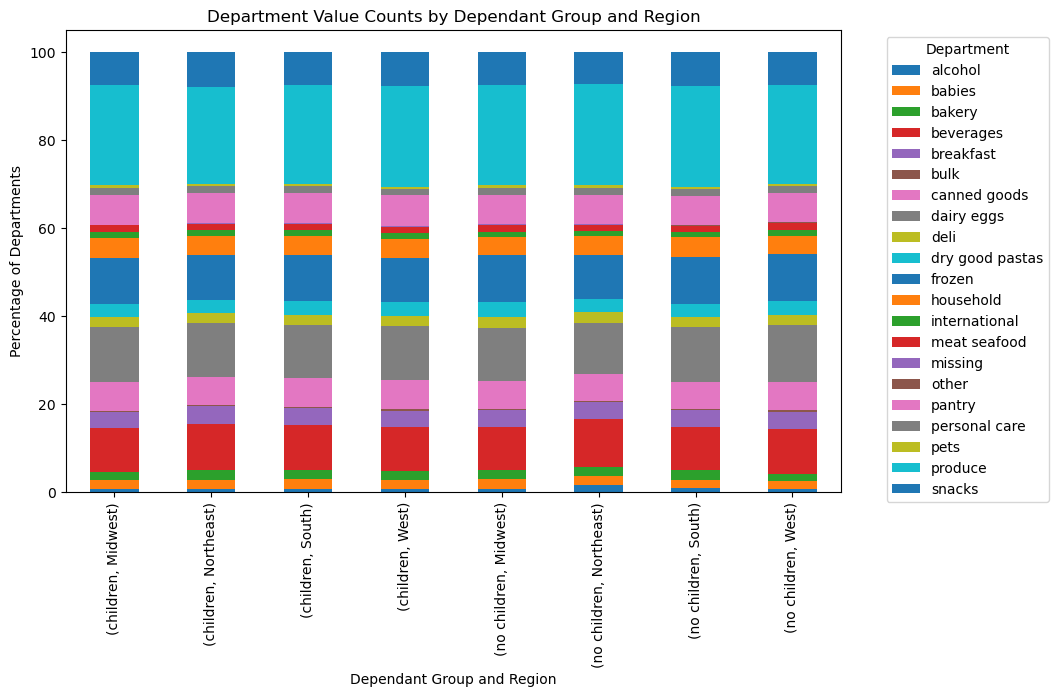

In [77]:
# Comparing Dependant status amongst regions
dependant_region_department_filtered = updated_customer_data[updated_customer_data['Region'] != 'Missing Data']
#Creating a 100% stacked bar graph
dependant_region_department_counts = dependant_region_department_filtered.groupby(['Dependant_Status', 'Region', 'department_id']).size().unstack(fill_value=0)
percent_data = dependant_region_department_counts.div(dependant_region_department_counts.sum(axis=1), axis=0) * 100
ax = percent_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Dependant Group and Region')
plt.ylabel('Percentage of Departments')
plt.title('Department Value Counts by Dependant Group and Region')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Department_Dependant_Region_4.10.png'), bbox_inches='tight')

In [103]:
# Exporting file
updated_customer_data.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_final_analysis.pkl'))